### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [3]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
default = pd.read_csv('data/credit.csv', index_col=0)

In [5]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [10]:
default.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

##### Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

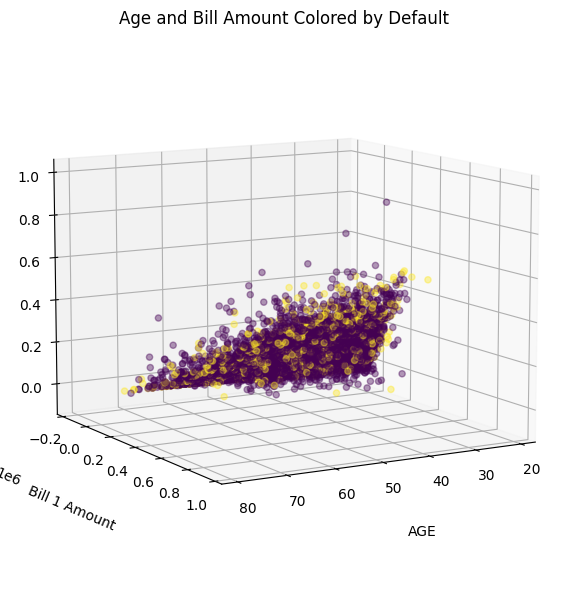

In [13]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(default['AGE'], default['BILL_AMT1'], default['BILL_AMT2'], c = default['default.payment.next.month'], alpha = 0.4)
ax.set_xlabel('AGE', labelpad = 20)
ax.set_ylabel('Bill 1 Amount', labelpad = 20)
ax.set_zlabel('Bill 2 Amount', labelpad = 20)
ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

In [80]:
px.scatter_3d(data_frame=default, x = 'AGE', y = 'BILL_AMT1', z = 'BILL_AMT2', color = 'default.payment.next.month')

## Normalize using Standard Scaler

Use `sklearn.preprocessing.StandardScaler`. 

Before apply the scaler, drop label column, `default.payment.next.month`, from the data set.

In [82]:
ndf = default.drop(["default.payment.next.month"], axis=1)

scalser = StandardScaler()
scaled_df = scalser.fit_transform(ndf)
scaled_df

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

## Apply Principal Component Analysis (PCA)



## Test 1. Project data to Two dimensions

Apply `n_components=2` for PCA

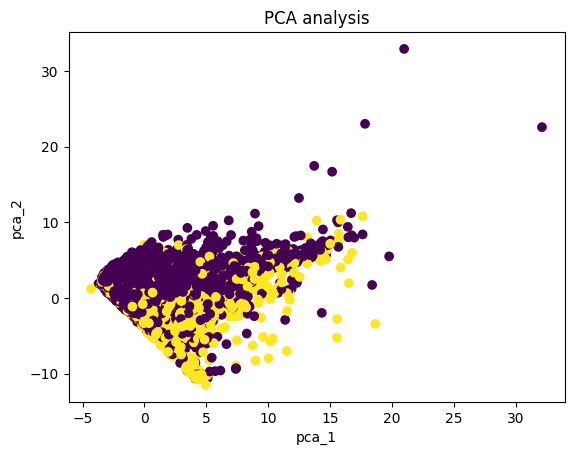

In [93]:
pca_2 = PCA(n_components=2)
df2 = pca_2.fit_transform(scaled_df)

# Use the label from the original data frame 
plt.scatter(x=df2[:,0], y =df2[:,1], c=default['default.payment.next.month'])
plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.title("PCA analysis")
plt.savefig("./images/pca_two_dim.png")

> Note 
>
> Data isn't perfectly divided into two but we can see two cluster of groups that represent default customer and not. 
> 

## Test 2. Project data to Three dimensions

Apply `n_components=3` for PCA

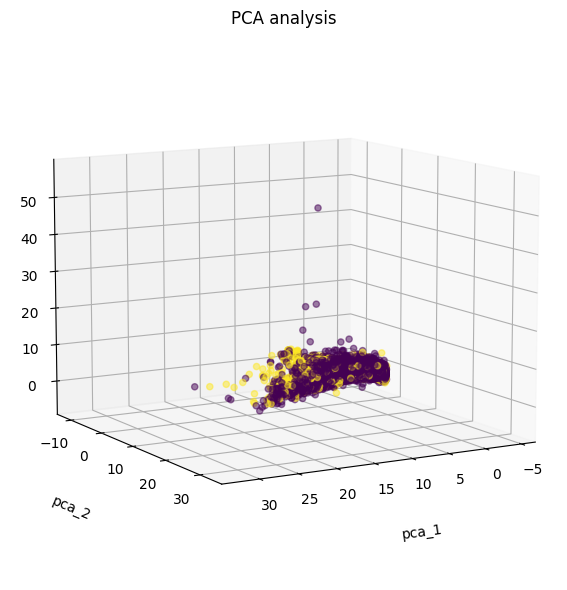

In [97]:
pca_3 = PCA(n_components=3)
df3 = pca_3.fit_transform(scaled_df)


plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(df3[:,0], df3[:,1], df3[:,2], c = default['default.payment.next.month'], alpha = 0.5)
ax.set_xlabel('pca_1', labelpad = 20)
ax.set_ylabel('pca_2', labelpad = 20)
ax.set_zlabel('pca_3', labelpad = 20)
ax.view_init(10, 60)
plt.title('PCA analysis')
plt.tight_layout()
plt.savefig("./images/pca_three_dimensions.png")

Let try to use plotly to have interative analysis on 3D chart

In [99]:
df3 = pd.DataFrame(df3)
df3["default.payment.next.month"] = default["default.payment.next.month"]
fig = px.scatter_3d(data_frame=df3, x = 0, y = 1, z = 2, color = 'default.payment.next.month')
fig.write_image("./images/plotly_pca_three_dim.png")
fig.show()

> Note 
>
> Data isn't perfectly divided into two and it't not clear to see two colored group from the 3D chart.
> 

### Test Result

From the test, it was easier for me to see two group using 2 diemeions PCA.

## Appendix

### Test 3.

> This test #3 isn't the main topic of this experiment.

Find the appropreate r for the PCA paprameter. To do that, use 23 which is total number of column 

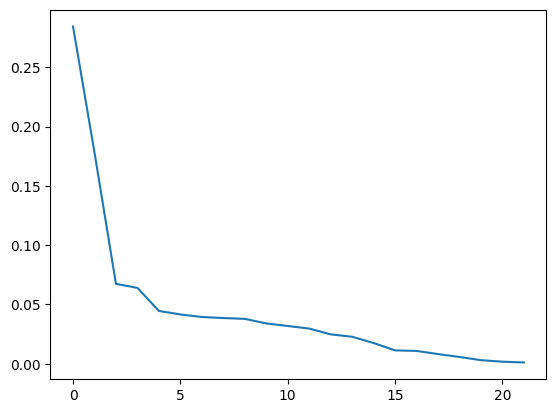

In [83]:
pca = PCA(n_components=22)
pca.fit(scaled_df)


plt.plot(pca.explained_variance_ratio_)

Find the accumulated ratio reaches 0.8

In [87]:
r = ((np.cumsum(pca.explained_variance_ratio_)<0.8)).sum()
print(f"80% of information can be supported by {r} features")

80% of information can be supported by 9 features


Try to use the variable `r` we found from the previous step

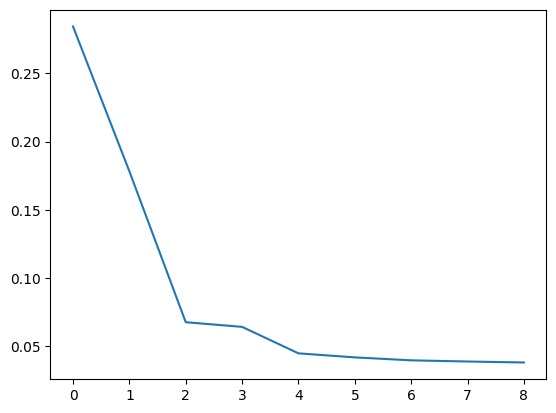

In [100]:
pca_r = PCA(n_components=r)
pca_r.fit(scaled_df)
plt.plot((pca_r.explained_variance_ratio_))